(31, 10)
            Temperature  DewPoint  Humidity  Sea Level PressureIn  \
EST                                                                 
2016-01-15           43        31        62                 29.82   

            VisibilityMiles  WindSpeedMPH PrecipitationIn  CloudCover Events  \
EST                                                                            
2016-01-15                9           5.0               T           2    NaN   

            WindDirDegrees  
EST                         
2016-01-15             101  
EST
2016-01-01    38
2016-01-06    33
2016-01-11    33
2016-01-16    47
2016-01-21    31
2016-01-26    43
2016-01-31    46
Name: Temperature, dtype: int64


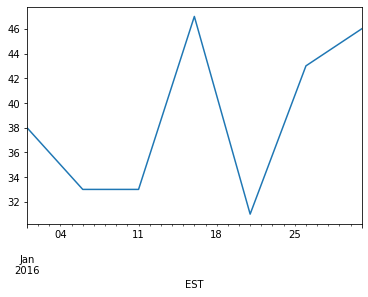

In [26]:
import pandas as pd
df = pd.read_csv("./data/nyc_weather.csv", parse_dates=["EST"], index_col="EST")
df.head(5)
print(df.shape)

print(df[14:15])

df.Temperature.min()
ds = df.Temperature[::5]
print(ds)

%matplotlib inline
ds.plot()

EST
2016-01-03    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-10    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-17    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: Temperature, dtype: object

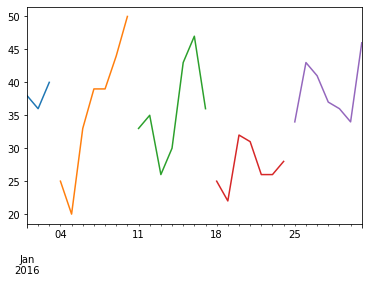

In [54]:
ds = df.Temperature.resample("W")
ds
ds.plot()

In [41]:
ts1 = pd.date_range(start = "2021-01-01", freq = "5D", periods = 5)
ts2 = pd.date_range(start = "2021-01-01", freq = "4D", periods = 6)
ts3 = ts1.difference(ts2)
print(ts1)
print(ts2)
ts3

DatetimeIndex(['2021-01-01', '2021-01-06', '2021-01-11', '2021-01-16',
               '2021-01-21'],
              dtype='datetime64[ns]', freq='5D')
DatetimeIndex(['2021-01-01', '2021-01-05', '2021-01-09', '2021-01-13',
               '2021-01-17', '2021-01-21'],
              dtype='datetime64[ns]', freq='4D')


DatetimeIndex(['2021-01-06', '2021-01-11', '2021-01-16'], dtype='datetime64[ns]', freq=None)

In [98]:
import datetime as dt
from pandas.tseries.offsets import CustomBusinessDay
little_week_mask = "Mon Tue Wed Thu Fri Sat Sun"
oct_holiday_list = ['2021-10-01','2021-10-02','2021-10-03','2021-10-04','2021-10-05','2021-10-06','2021-10-07']
oct_days = pd.date_range(start=dt.datetime(2021,10,1),end=dt.datetime(2021,10,31))
sat_list = oct_days[oct_days.dayofweek==6]
big_week_sat_list = sat_list[1::2]
sat_list

oct_off_day_list =big_week_sat_list.union(pd.to_datetime( pd.Series(oct_holiday_list))) 
print(oct_off_day_list)

#class myCalender():
#cust3 = CustomBusinessDay(calender = myCalender())
#oct_work_days = pd.date_range(start = '2021-10-01', end='2021-10-31', freq = cust3)
#work_days_in_oct =pd.date_range(start='2021-10-01', end='2021-10-31',  freq=CustomBusinessDay(holidays=oct_holiday_list, weekmask =little_week_mask ))
work_days_in_oct =pd.date_range(start='2021-10-01', end='2021-10-31',  freq=CustomBusinessDay(holidays=oct_off_day_list, weekmask =little_week_mask ) )
work_days_in_oct 

Index([2021-10-01 00:00:00, 2021-10-02 00:00:00, 2021-10-03 00:00:00,
       2021-10-04 00:00:00, 2021-10-05 00:00:00, 2021-10-06 00:00:00,
       2021-10-07 00:00:00, 2021-10-10 00:00:00, 2021-10-24 00:00:00],
      dtype='object')


DatetimeIndex(['2021-10-08', '2021-10-09', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-10-30', '2021-10-31'],
              dtype='datetime64[ns]', freq='C')

In [115]:
start_date = pd.to_datetime("2021-08-01")
start_value = start_date.value
end_value = start_value + 10**9 * 3600*24*1000
end_date = pd.to_datetime(end_value)
print(end_date)

2024-04-27 00:00:00


In [162]:
import numpy as np
y= pd.Period("2021-08-01")
z = y + 1000
print(z)
y= pd.Period("2021-08-01", freq = "M")
z = y-2
print(z)
a= pd.period_range("2021-08", "2021-09",freq = "W")
values= pd.Series(np.random.randint(10,100, len(a)), index = a)
print(a)
b = a.asfreq("H", how = "end")
b

2024-04-27
2021-06
PeriodIndex(['2021-07-26/2021-08-01', '2021-08-02/2021-08-08',
             '2021-08-09/2021-08-15', '2021-08-16/2021-08-22',
             '2021-08-23/2021-08-29', '2021-08-30/2021-09-05'],
            dtype='period[W-SUN]', freq='W-SUN')


PeriodIndex(['2021-08-01 23:00', '2021-08-08 23:00', '2021-08-15 23:00',
             '2021-08-22 23:00', '2021-08-29 23:00', '2021-09-05 23:00'],
            dtype='period[H]', freq='H')

In [163]:
df = pd.read_csv("./data/wmt.csv", header = 0)
print(df.head(5))
df.set_index("Line Item", inplace = True)
df = df.T
print(df.head(5))
print(df.index)
new_index = pd.PeriodIndex(df.index, freq = "q-dec")
print(new_index)

  Line Item  2017Q1  2017Q2  2017Q3  2017Q4  2018Q1
0   Revenue  115904  120854  118179  130936  117542
1  Expenses   86544   89485   87484   97743   87688
2    Profit   29360   31369   30695   33193   29854
Line Item  Revenue  Expenses  Profit
2017Q1      115904     86544   29360
2017Q2      120854     89485   31369
2017Q3      118179     87484   30695
2017Q4      130936     97743   33193
2018Q1      117542     87688   29854
Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')
PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-DEC]', freq='Q-DEC')


In [169]:
df.index = new_index


In [172]:
df.index[0].start_time

Timestamp('2017-01-01 00:00:00')

In [175]:
df["start"] = df.index.map(lambda x: x.start_time)
df["end"] = df.index.map(lambda x: x.end_time.date)
df

Line Item,Revenue,Expenses,Profit,start,end
2017Q1,115904,86544,29360,2017-01-01,2017-03-31
2017Q2,120854,89485,31369,2017-04-01,2017-06-30
2017Q3,118179,87484,30695,2017-07-01,2017-09-30
2017Q4,130936,97743,33193,2017-10-01,2017-12-31
2018Q1,117542,87688,29854,2018-01-01,2018-03-31
